In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = sns.load_dataset('titanic')
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [17]:
df = data[['survived','sex','age','fare','class','embark_town','alone']]

In [18]:
df.head(10)

,survived,sex,age,fare,class,embark_town,alone
0,0,male,22.0,7.2500,Third,Southampton,False
1,1,female,38.0,71.2833,First,Cherbourg,False
2,1,female,26.0,7.9250,Third,Southampton,True
3,1,female,35.0,53.1000,First,Southampton,False
4,0,male,35.0,8.0500,Third,Southampton,True
5,0,male,NaN,8.4583,Third,Queenstown,True
6,0,male,54.0,51.8625,First,Southampton,True
7,0,male,2.0,21.0750,Third,Southampton,False
8,1,female,27.0,11.1333,Third,Southampton,False
9,1,female,14.0,30.0708,Second,Cherbourg,False


In [19]:
age_mean =df['age'].mean()
df['age'].fillna(age_mean, inplace=True)
df.head(10)

C:\Users\Adrian\AppData\Local\Temp\ipykernel_3788\3465158753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].fillna(age_mean, inplace=True)


,survived,sex,age,fare,class,embark_town,alone
0,0,male,22.000000,7.2500,Third,Southampton,False
1,1,female,38.000000,71.2833,First,Cherbourg,False
2,1,female,26.000000,7.9250,Third,Southampton,True
3,1,female,35.000000,53.1000,First,Southampton,False
4,0,male,35.000000,8.0500,Third,Southampton,True
5,0,male,29.699118,8.4583,Third,Queenstown,True
6,0,male,54.000000,51.8625,First,Southampton,True
7,0,male,2.000000,21.0750,Third,Southampton,False
8,1,female,27.000000,11.1333,Third,Southampton,False
9,1,female,14.000000,30.0708,Second,Cherbourg,False


In [20]:
df[['age','fare']].describe()

,age,fare
count,891.000000,891.000000
mean,29.699118,32.204208
std,13.002015,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,29.699118,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


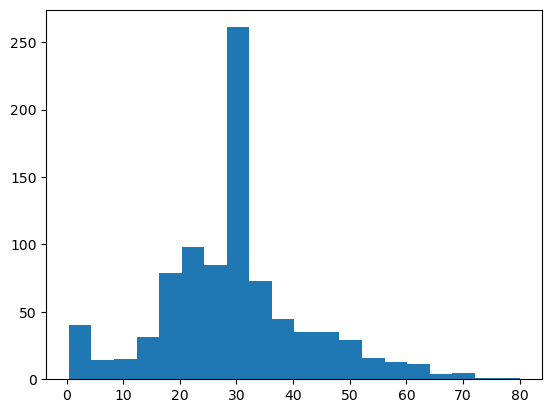

In [23]:
plt.hist(df['age'], bins = 20);

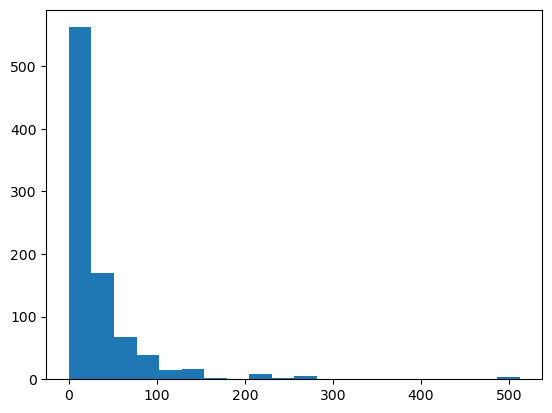

In [24]:
plt.hist(df['fare'], bins = 20);

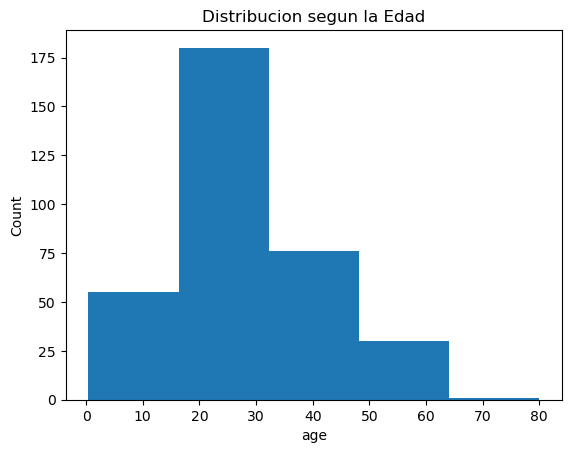

In [25]:
survived =df[df['survived']==1]
plt.hist(survived['age'],bins = 5)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Distribucion segun la Edad')
plt.show();

#### Esto podría sugerir que las personas en estas edades tenían una mayor probabilidad de sobrevivir en comparación con otras edades.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train, test = train_test_split(df, test_size=0.3, stratify=df['survived'],random_state=29)

In [64]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [65]:
x_train = train.drop('survived', axis= 1)
y_train = train['survived']

In [66]:
tree = DecisionTreeClassifier(max_depth=5,random_state=1)

In [67]:
x_train = pd.get_dummies(x_train, columns=['sex'])
x_train = pd.get_dummies(x_train, columns=['class'])
x_train = pd.get_dummies(x_train, columns=['embark_town'])
x_train = pd.get_dummies(x_train, columns=['alone'])

In [68]:
tree = DecisionTreeClassifier(max_depth=5, random_state=1)

In [69]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [70]:
y_train_pred = tree.predict(x_train)

In [71]:
train_acc = accuracy_score(y_train, y_train_pred)

In [72]:
print('Precision de arbol de decision: ', train_acc)

Precision de arbol de decision:  0.8426966292134831


In [73]:
tree.feature_names_in_

array(['age', 'fare', 'sex_female', 'sex_male', 'class_First',
       'class_Second', 'class_Third', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton', 'alone_False',
       'alone_True'], dtype=object)

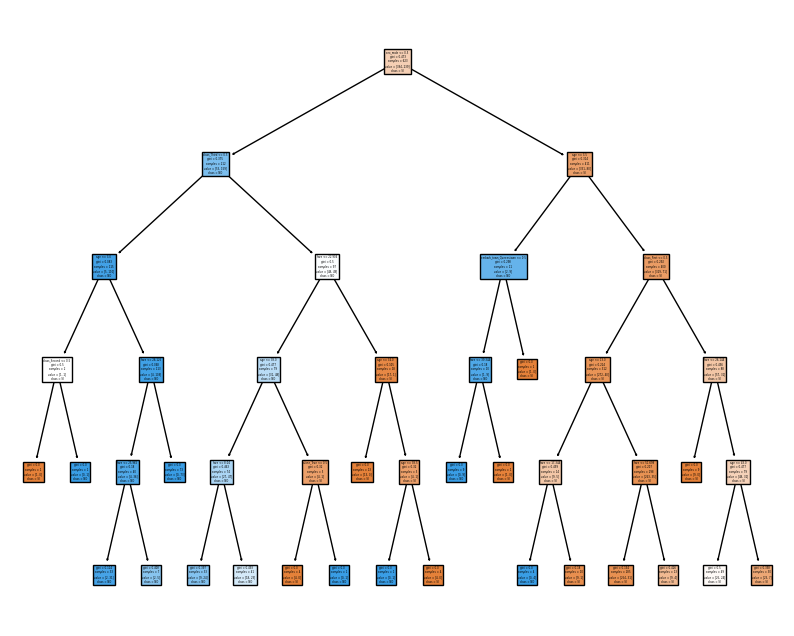

In [77]:
plt.figure(figsize=(10, 8))
plot_tree(tree,feature_names=tree.feature_names_in_,class_names=['SI','NO'], filled=True);